In [22]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import pandas as pd

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## **Task 1**: Binary Classification with SVM (Banknote Authentication)
![](https://www.neuraldesigner.com/images/banknote-authentication.webp)
[Image Source](https://www.neuraldesigner.com/blog/banknote-authentication/)

- **Dataset**: Banknote Authentication — wavelet-transformed images of banknotes.
- **Target**: Predict whether a banknote is `genuine` (1) or `fake` (0).

**Use the file "banknotes.csv"**

- Explore the dataset:

  - How many samples and features are there?

  - What are the ranges of the features?

  - How balanced is the target variable?

- Split the dataset into training and test sets (e.g., 70/30).
- Train a **Logistic Regression** classifier.
  - Report accuracy, precision, recall, F1-score.
  - Show the confusion matrix.

- Train an **SVM** with a `linear` kernel.
  - Report accuracy, precision, recall, and F1-score.
  - Show the confusion matrix.

- Train another **SVM** with an **`RBF`** kernel and
Compare performance with the `linear` SVM.

- Use only two features (e.g., variance and skewness) and plot the decision boundary.

**Deliverable**: A table comparing metrics across the three models, plus plots of decision boundaries with two features.

In [23]:
# Don't forget to put the csv file in the same folder with the notebook
# If you are using Colab, you need to upload the file
# banknotes.csv is available on Itslearning
bank_data = pd.read_csv('banknotes.csv')
bank_data.head()

,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


In [24]:
print(bank_data.shape)

print(bank_data.describe())

print(bank_data['class'].value_counts())

(1372, 5)
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
class
0    762
1    610
Name: count, dtype: int64


In [25]:
# Binary Classification
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()
model_2 = svm.SVC(kernel='rbf')
model_3 = svm.SVC(kernel='linear')

models = {
    'Logistic Regression': model_1,
    'SVM with RBF kernel': model_2,
    'SVM with Linear kernel': model_3
}

X = bank_data.drop('class', axis=1)
y = bank_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")


Model: Logistic Regression
[[221   2]
 [  0 189]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       223
           1       0.99      1.00      0.99       189

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



Model: SVM with RBF kernel
[[223   0]
 [  0 189]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00       189

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



Model: SVM with Linear kernel
[[221   2]
 [  0 189]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       223
           1       0.99      1.00      0.99       189

    accuracy             

C:\Users\lautrup\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


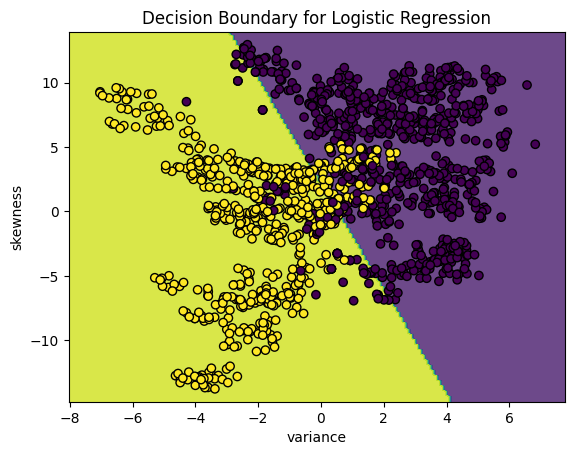

C:\Users\lautrup\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


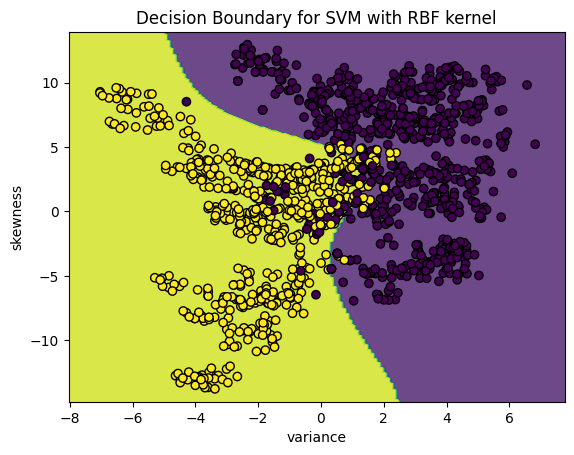

C:\Users\lautrup\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


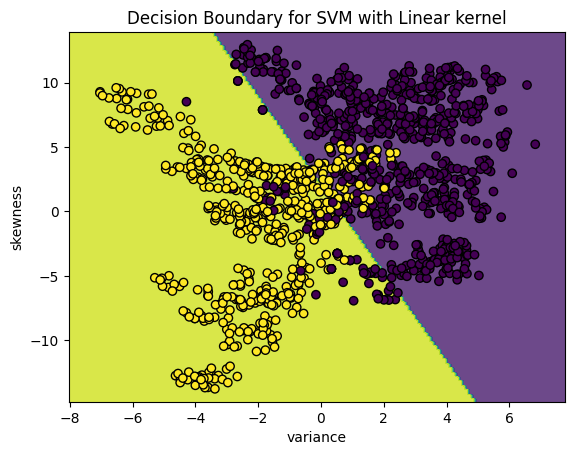

In [26]:
# Visualizing decision boundaries for the first two features
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, model_name, X, y):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title(f'Decision Boundary for {model_name}')
    plt.show()

X_2d = X.iloc[:, :2]  # Using only the first two features for visualization
for model_name, model in models.items():
    model.fit(X_2d, y)
    plot_decision_boundary(model, model_name, X_2d, y)

### Effect of Feature Scaling
Train again with `StandardScaler` applied to the features.
Compare results.

**Why does scaling matter?**

In [27]:
# Features Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Model (with scaling): {model_name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

Model (with scaling): Logistic Regression
[[216   7]
 [  0 189]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       223
           1       0.96      1.00      0.98       189

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



Model (with scaling): SVM with RBF kernel
[[223   0]
 [  0 189]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00       189

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



Model (with scaling): SVM with Linear kernel
[[217   6]
 [  0 189]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       223
           1       0.97      1.00  

C:\Users\lautrup\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


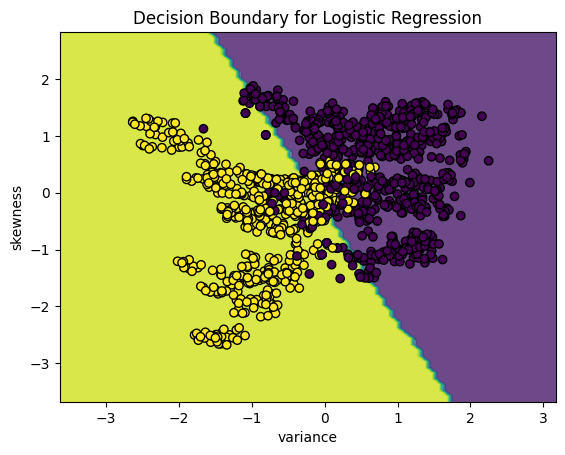

C:\Users\lautrup\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


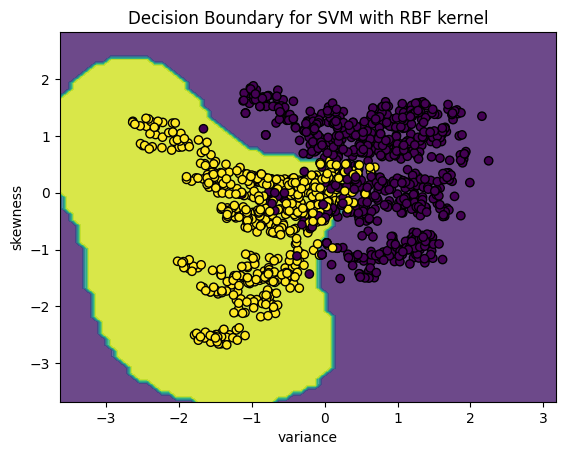

C:\Users\lautrup\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


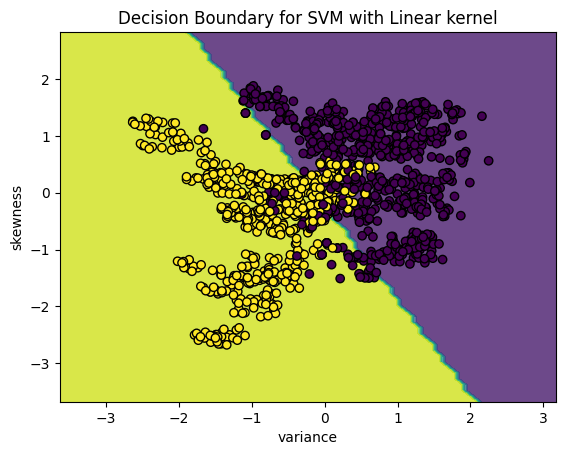

In [28]:
X_2d = X_scaled.iloc[:, :2]  # Using only the first two features for visualization
for model_name, model in models.items():
    model.fit(X_2d, y)
    plot_decision_boundary(model, model_name, X_2d, y)

---
## **Task 2**: Multi-Class Classification (Wine Dataset)

The data is the results of a chemical analysis of wines grown in the same
region in Italy by three different cultivators. There are thirteen different
measurements taken for different constituents found in the three types of
wine.

![](https://www.g3enterprises.com/content/dam/g3/insights/blog/bottles/colored-glass-bottles-g3e.jpg)
[Image Source](https://www.g3enterprises.com/blog/choosing-between-clear-and-colored-wine-bottles-for-your-wine)


- **Dataset**: Wine Recognition — chemical analysis of wines.
- **Target**: Predict the wine class (3 possible classes).

Instructions:

- Load the dataset (sklearn.datasets.load_wine).
- Perform a quick exploration:
  - Number of classes and class distribution.
  - Inspect ranges of key features (e.g., alcohol, magnesium, phenols).
- Train an SVM with linear kernel and evaluate results.
- Train an SVM with RBF kernel and compare.
- Report performance using:
  - Confusion matrix
  - Classification report (precision, recall, F1 per class)

In [29]:
wine_dataset = datasets.load_wine()
print(wine_dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [30]:
# quick dataset exploration
X = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
y = pd.Series(wine_dataset.target)

print(X.shape)
print(X.describe())
print(y.value_counts())

(178, 13)
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min  

In [31]:
model_a = svm.SVC(kernel='linear')
model_b = svm.SVC(kernel='rbf')
models = {
    'SVM with Linear kernel': model_a,
    'SVM with RBF kernel': model_b
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

Model: SVM with Linear kernel
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Model: SVM with RBF kernel
[[19  0  0]
 [ 0 19  2]
 [ 0 11  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.63      0.90      0.75        21
           2       0.60      0.21      0.32        14

    accuracy                           0.76        54
   macro avg       0.74      0.71      0.69        54
weighted avg       0.75      0.76      0.72        54





---
## **Task3**: Multi-Class Classification (Iris Flower)
- **Dataset**: Iris Dataset — flower measurements.
- **Target**: Predict the species of iris flower (3 classes: Setosa, Versicolor, Virginica).

![](https://camo.githubusercontent.com/a606ca5baf004d747b29dcd8e852bf5d9f7cded62aee4375bcf301b6bd3ab574/68747470733a2f2f7777772e656d6265646465642d726f626f746963732e636f6d2f77702d636f6e74656e742f75706c6f6164732f323032322f30312f497269732d446174617365742d436c617373696669636174696f6e2d31303234783336372e706e67)


- Explore the dataset:

  - How many samples and features are there?
  - Plot the data in 2D using two selected features (e.g., sepal length vs. sepal width).

- Train an SVM classifier to classify iris flowers.
- Optimize your model by experimenting with:

  - Different kernels: linear, poly, rbf
  - Different values of C (regularization parameter)
  - Different decision functions: one-vs-rest (ovr) vs one-vs-one (ovo)
  - (Optional) Other parameters (e.g., degree for polynomial kernel, gamma for RBF/poly).

- Compare the performance of different configurations using:
Accuracy score, Confusion matrix, and Classification report (precision, recall, F1)

- Visualize the decision regions (use 2 features for visualization).
Train a SVM model to classify iris flowers. Try to optimize the performance of your model by trying different kernels `(linear, poly, and rbf)`, different values of `C`, different decision function `(ovr or ovo)`, and perhaps even other stuff. You can find a full list of options to tune at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

In [32]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [33]:
# dataset exploration
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print(X.shape)
print(X.describe())
print(y.value_counts())

(150, 4)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
0    50
1    50
2    50
Name: count, dtype: int64


In [34]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(
    C=1.0, 
    kernel='linear', 
    degree=3, 
    gamma='scale',
    decision_function_shape='ovo'
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



---
## **Hyperparameter Tuning with GridSearchCV**
`GridSearchCV` is a powerful tool in scikit-learn that allows for exhaustive search over specified parameter values for an estimator. It is particularly useful for hyperparameter tuning, where the goal is to find the best combination of parameters that result in the highest model performance. The GridSearchCV object takes an estimator, a parameter grid, and a scoring metric as inputs and performs a grid search over the specified parameter values, evaluating the model's performance using the chosen scoring metric. Key components of `GridSearchCV`:

- `Estimator`: The machine learning model to be tuned.
- `Param_grid`: Dictionary specifying the parameter grid to be searched.
- `Scoring`: Metric used to evaluate model performance.
- `CV`: Cross-validation strategy.

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

# SVC’s Hyperparameters:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly']}
            #   'degree':[0.5, 2]}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# grid = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_iter=20)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.952 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

# SVC’s Hyperparameters:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

param_grid = {'svc__C': [0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf', 'linear', 'poly']}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

grid = GridSearchCV(pipe, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.762 total time=   0.0s
[CV 1/5] END svc__C=0.1, svc__gamma=1, svc__kernel=linear;, score=0.952 total time=   0.0s
[CV 2/5] END svc__C=0.1, svc__gamma=1, svc__kernel=linear;, score=0.905 total time=   0.0s
[CV 3/5] END svc__C=0.1, svc__gamma=1, svc__kernel=linear;, score=0.905 total time=   0.0s
[CV 4/5] END svc__C=0.1, svc__gamma=1, svc__kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END svc__C=0.1, svc__gamma=1, svc__kernel=linear;, score=0.905 total time=   0.0s
[CV 1/5] END svc__C=0.1, svc__gamma=1, svc_

## **Advantages and disadvantages of SVMs**

Advantages

1. Easy to use with few parameters that need tuning.

> Add blockquote



Disadvantages

1. Does not work (without applying various tricks) for large datasets (>100k observations), as the method is very slow as the data size increases.
1. Somewhat "outdated". Often neural networks (for large datasets) or boosting methods (for small datasets) outperform SVMs.
1. No feature importance measures (all features are always included)
1. Do not provide classification probabilities/confidence